# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# I want to see all of the columns, but not the entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Data Overview

- Observations
- Sanity checks

In [2]:
# read the data
df = pd.read_csv("used_device_data.csv", index_col=0)

# display the number of rows and columns 
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  

# consistent random 10 sample rows
np.random.seed(1)
df.sample(n=10)

There are 3454 rows and 14 columns.


,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
brand_name,,,,,,,,,,,,,,
Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51


there are varying ranges of values from column to column 
release year should be data type datetime year 
some of these numerical values are float while others are integer
the 4g and 5g inputs are all lower case while the brand name and os start with a capital letter

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, Honor to Alcatel
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   os                3454 non-null   object 
 1   screen_size       3454 non-null   float64
 2   4g                3454 non-null   object 
 3   5g                3454 non-null   object 
 4   main_camera_mp    3275 non-null   float64
 5   selfie_camera_mp  3452 non-null   float64
 6   int_memory        3450 non-null   float64
 7   ram               3450 non-null   float64
 8   battery           3448 non-null   float64
 9   weight            3447 non-null   float64
 10  release_year      3454 non-null   int64  
 11  days_used         3454 non-null   int64  
 12  new_price         3454 non-null   float64
 13  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 404.8+ KB


main and selfie cameras are missing some values - this could be because the device doesnt have a camera 
the same goes for int memory, ram, and battery 
weight is missing for one of the entries 
there are 13 columns

In [4]:
# view which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

it makes sense that main camera has the most missing values while selfie camera only has 2 missing values.  the data set must be considering the camera on a laptop or similar device to be a selfie camera. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


In [6]:
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # if there are NA counts, display them
    print(val_counts)
    print('\n\n') # more space between for visuals

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64



yes    2335
no     1119
Name: 4g, dtype: int64



no     3302
yes     152
Name: 5g, dtype: int64





There arent any nan, so the missing data in the table is just blank values. 
this data represents the release year and os type well with a spread of 4g values, while there is a small portion of the users with 5g connection. Making an inference, one could say the small proportion of iOS users are represented in the small proportion of users with 5g connection.  
This theory could be further tested with correlation as well as checking the proportion of 5g users are also iOS users. 



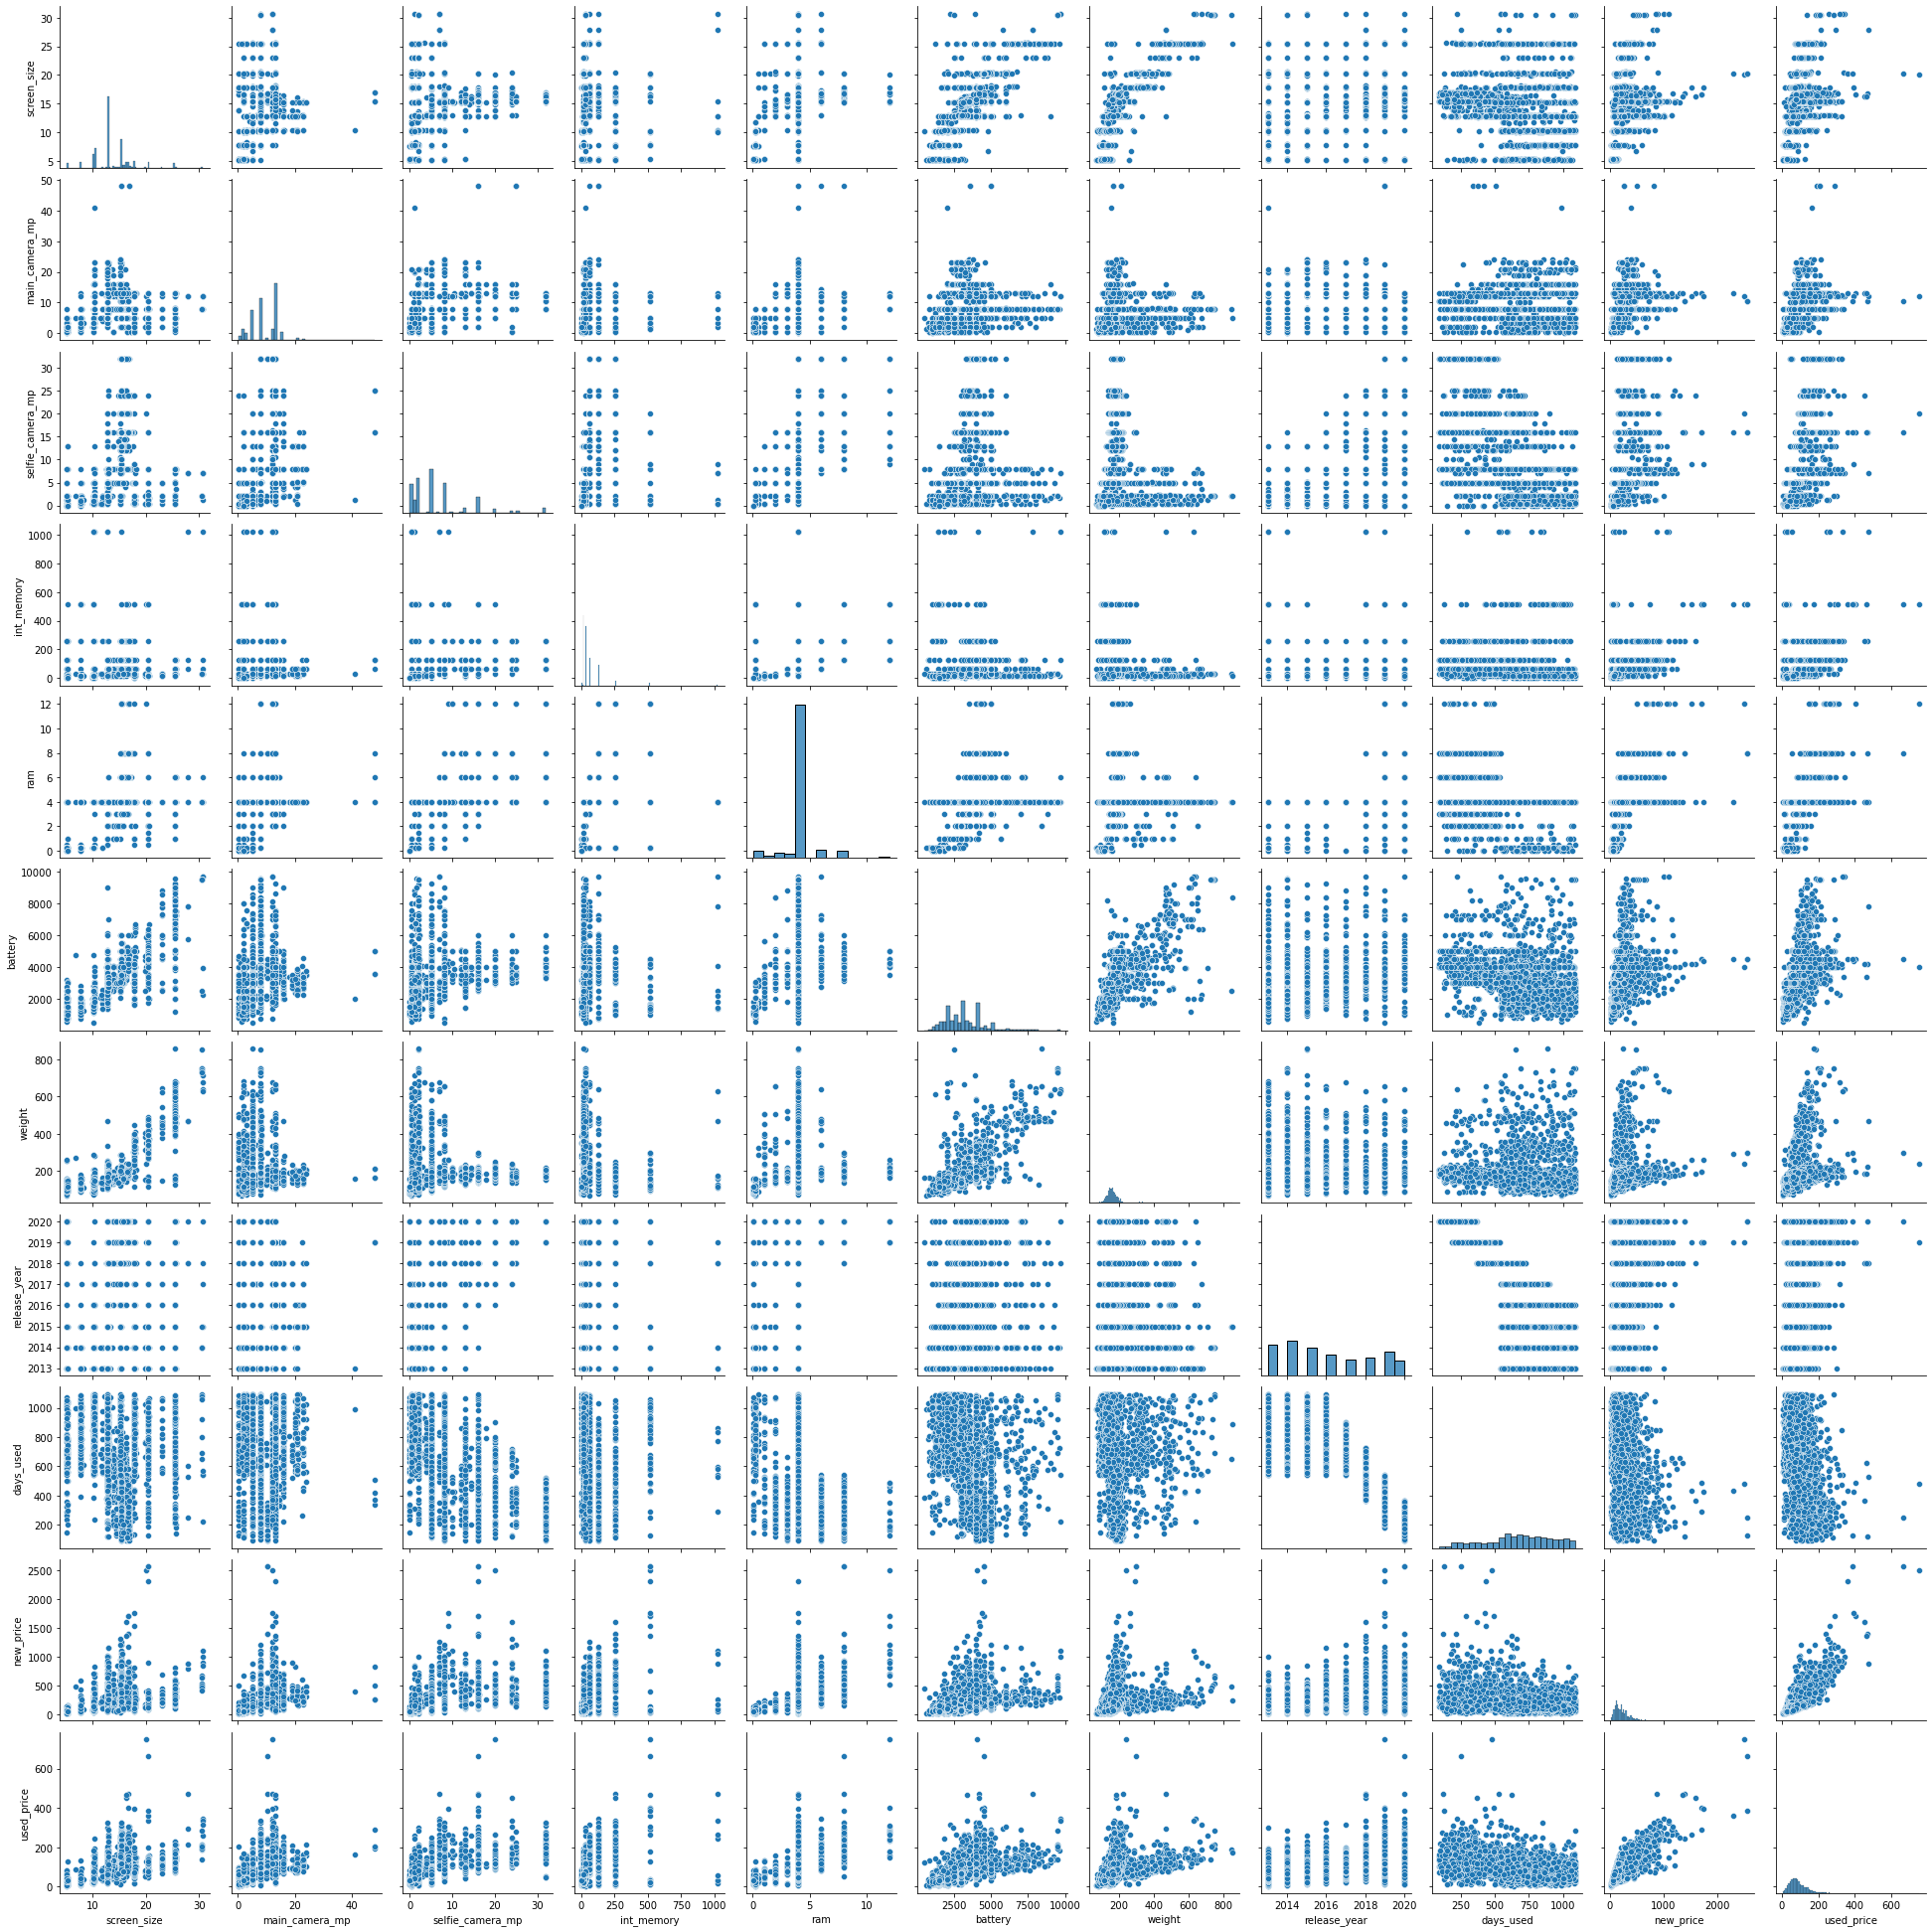

In [7]:
# distributions 
sns.pairplot(df)

In [8]:
# percentage of used device market dominated by android devices
total_devices = 3454
num_android = df.os.value_counts().Android
print("The percentage of used device market dominated by android devices is", num_android / total_devices * 100)

The percentage of used device market dominated by android devices is 93.05153445280834


<AxesSubplot:xlabel='os', ylabel='ram'>

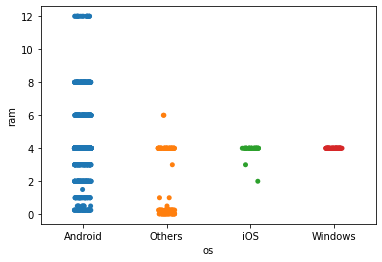

In [9]:
# RAM varying with the brand
sns.stripplot(x="os", y="ram", data=df)

<AxesSubplot:xlabel='battery', ylabel='weight'>

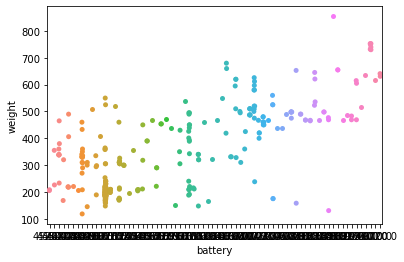

In [10]:
# batteries over 4500 mAh varying over weight
above_450 = df[df["battery"] > 4500]
sns.stripplot(x="battery", y="weight", data=above_450)

There's an overall positive trend.  As battery mAh increases, weight increases. There are a few products which have a low weight but have still optimized the battery mAh.  

3362

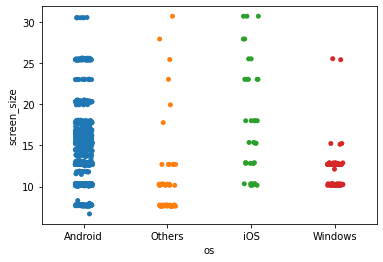

In [11]:
# screens larger than 6 inches 
# os 
above_6 = df[df["screen_size"] > 6]
sns.stripplot(x="os", y="screen_size", data=above_6)
# count number of entries 
above_6[above_6.columns[0]].count()

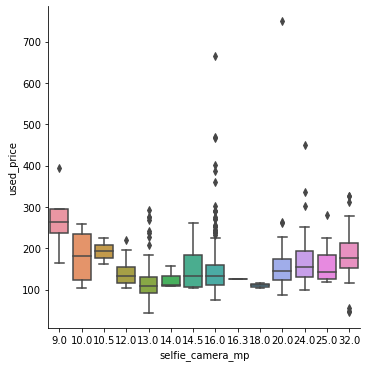

In [12]:
above_8 = df[df["selfie_camera_mp"] > 8]
sns.catplot(x="selfie_camera_mp", y="used_price", data=above_8, kind = 'box')

In [13]:
selfie_counts = above_8.selfie_camera_mp.value_counts()
selfie_counts

16.0    298
32.0     94
13.0     90
20.0     67
24.0     30
25.0     28
12.0     21
10.0     10
14.5      5
9.0       4
14.0      3
18.0      2
10.5      2
16.3      1
Name: selfie_camera_mp, dtype: int64

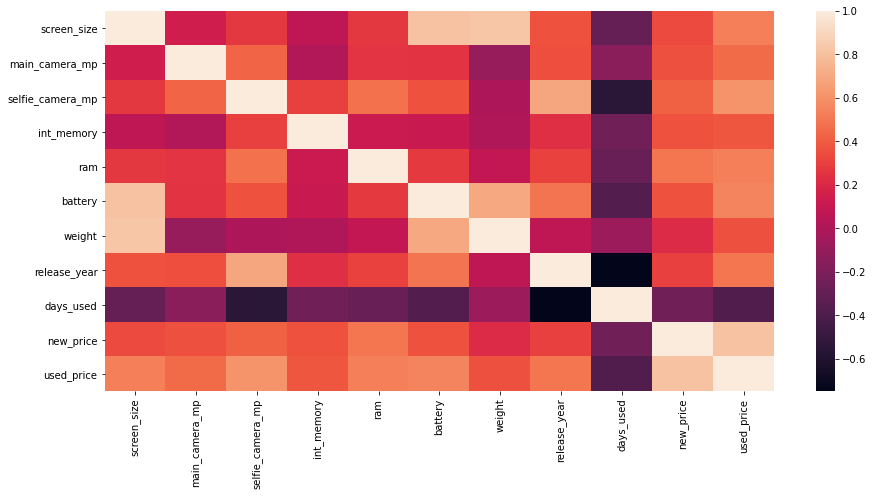

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_columns].corr())
plt.show()

Used price has a correlation value of 0.5 or above for the columns screen size, selfie camera mp, ram, battery, release year, and new price with new price being the highest correlation of about 0.8. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

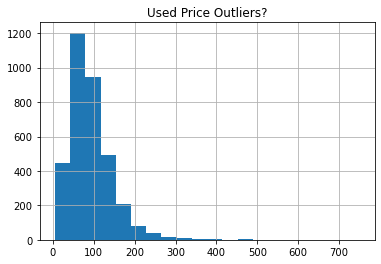

92.30293572669365


In [15]:
df['used_price'].hist(bins=20)
plt.title('Used Price Outliers?')
plt.show()
print(df['used_price'].mean())

In [16]:
used = df['used_price'][df['used_price'].notnull()]

print(used.mean())  # the mean is being pulled
print(used.median())

92.30293572669365
81.87


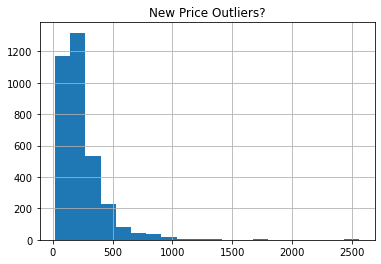

237.03884771279652


In [17]:
df['new_price'].hist(bins=20)
plt.title('New Price Outliers?')
plt.show()
print(df['new_price'].mean())

In [18]:
new = df['new_price'][df['new_price'].notnull()]

print(new.mean())  # the mean is being pulled
print(new.median())

237.03884771279652
189.78500000000003


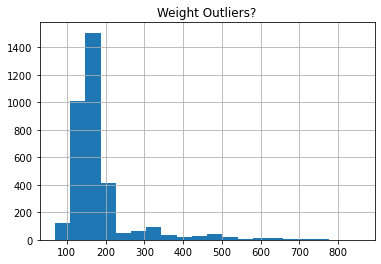

182.7518711923413


In [19]:
df['weight'].hist(bins=20)
plt.title('Weight Outliers?')
plt.show()
print(df['weight'].mean())

In [20]:
weight_nn = df['weight'][df['weight'].notnull()]

print(weight_nn.mean())  # the mean is being pulled
print(weight_nn.median())

182.7518711923413
160.0


In [21]:
# We have missing values for the columns main_camera_mp with 3275 values, selfie_camera_mp with 3452 values, int_memory with 3450 values, ram with 3450 values, battery with 3448 values, and weight with 3447 values. 
# We will fill these values with their median values, since the data is skewed and we need all of the data for further analysis 
df['main_camera_mp'].fillna(df['main_camera_mp'].median(), inplace=True)
df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].median(), inplace=True)
df['int_memory'].fillna(df['int_memory'].median(), inplace=True)
df['ram'].fillna(df['ram'].median(), inplace=True)
df['battery'].fillna(df['battery'].median(), inplace=True)
df['weight'].fillna(df['weight'].median(), inplace=True)

In [22]:
# drop one of the columns for no linear dependency 
df = pd.get_dummies(df, columns=["os"], drop_first=True)
df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_Others,os_Windows,os_iOS
brand_name,,,,,,,,,,,,,,,,
Honor,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,0,0,0
Honor,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,0,0,0
Honor,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,0,0,0
Honor,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,0,0,0
Honor,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,0,0,0


In [23]:
df = pd.get_dummies(df, columns=["4g"])
df.head()

,screen_size,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_Others,os_Windows,os_iOS,4g_no,4g_yes
brand_name,,,,,,,,,,,,,,,,,
Honor,14.50,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,0,0,0,0,1
Honor,17.30,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,0,0,0,0,1
Honor,16.69,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,0,0,0,0,1
Honor,25.50,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,0,0,0,0,1
Honor,15.32,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,0,0,0,0,1


In [24]:
df = pd.get_dummies(df, columns=["5g"])
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
brand_name,,,,,,,,,,,,,,,,,,
Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,0,0,0,0,1,1,0
Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,0,0,0,0,1,0,1
Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,0,0,0,0,1,0,1
Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,0,0,0,0,1,0,1
Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,0,0,0,0,1,1,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [25]:
df.isnull().sum()

screen_size         0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
os_Others           0
os_Windows          0
os_iOS              0
4g_no               0
4g_yes              0
5g_no               0
5g_yes              0
dtype: int64

In [26]:
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
brand_name,,,,,,,,,,,,,,,,,,
Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,0,0,0,0,1,1,0
Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,0,0,0,0,1,0,1
Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,0,0,0,0,1,0,1
Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,0,0,0,0,1,0,1
Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,0,0,0,0,1,1,0


## Building a Linear Regression model

In [27]:
# dropping independent and dependent variables of what we are trying to predict
x = df.drop(["used_price"], axis=1)
y = df[["used_price"]]

In [28]:
# the intercept
x = sm.add_constant(x)

In [29]:
# split into train and test datasets 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [30]:
print(x_train.head())

            const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
brand_name                                                                     
XOLO          1.0        10.29             8.0               0.3        16.0   
Lenovo        1.0        15.34            13.0               5.0        32.0   
Honor         1.0        12.70            13.0               5.0        32.0   
XOLO          1.0        12.83             8.0               5.0        16.0   
Others        1.0        12.88            13.0              16.0        16.0   

            ram  battery  weight  release_year  days_used  new_price  \
brand_name                                                             
XOLO        4.0   1800.0   120.0          2014        819     121.05   
Lenovo      4.0   4050.0   225.0          2016        585     229.20   
Honor       4.0   2550.0   162.0          2015        727     170.36   
XOLO        4.0   3200.0   160.0          2015        800     179.33   
Others 

In [31]:
print(x_test.head())

            const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
brand_name                                                                     
Others        1.0        15.24            8.00               2.0        16.0   
Celkon        1.0        10.16            3.15               0.3       512.0   
Infinix       1.0        15.39            8.00               8.0        32.0   
Oppo          1.0        12.83           13.00              16.0        64.0   
LG            1.0        15.29           13.00               5.0        32.0   

             ram  battery  weight  release_year  days_used  new_price  \
brand_name                                                              
Others      4.00   3000.0   206.0          2014        632     179.61   
Celkon      0.25   1400.0   140.0          2013        637      48.65   
Infinix     2.00   5000.0   185.0          2020        329      88.88   
Oppo        4.00   3200.0   148.0          2017        648     281.30   
L

## Model performance evaluation

In [32]:
# fitting the linear model 
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()

In [33]:
#print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     752.9
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11032.
No. Observations:                2417   AIC:                         2.210e+04
Df Residuals:                    2401   BIC:                         2.219e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -994.9747    434.887  

The testing model predicts 82.5% of the training model, according to the r squared value. 
4g and 5g are very similar in predicting the used device price. 
I see a slight difference in their trend of prediction of used price, so we need to test multicollinearity in our data. 
The predictor variables should be independent of each other. 

In [34]:
#check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const               0.000000
screen_size         7.179272
main_camera_mp      1.780872
selfie_camera_mp    2.494773
int_memory          1.397798
ram                 2.106398
battery             3.816517
weight              6.152738
release_year        4.355972
days_used           2.586631
new_price           2.018961
os_Others           1.478171
os_Windows          1.023089
os_iOS              1.102376
4g_no                    inf
4g_yes                   inf
5g_no                    inf
5g_yes                   inf
dtype: float64



/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Screen size, weight, battery, and release year are correlated with one or more independent features.
We can trust the p-values of main_camera_mp, selfie_camera_mp, int_memory, ram days_used, new_price origin and the os variables.

In [35]:
# remove multicollinear variable screen size 
x_train2 = x_train.drop(["screen_size"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.823 
Adjusted R-squared: 0.822


R squared only decreases by 0.001 

In [36]:
# trying another variable weight
x_train3 = x_train.drop(["weight"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.82 
Adjusted R-squared: 0.819


R squared only decreases by 0.001 

In [37]:
# trying another variable battery
x_train4 = x_train.drop(["battery"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.825 
Adjusted R-squared: 0.824


R squared only decreases by 0.001 

In [38]:
x_train5 = x_train.drop(["release_year"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.824 
Adjusted R-squared: 0.823


R squared only decreases by 0.001 

Since there is zero and 0.001 change on the r squared values, we can drop them one by one and check to see if multicollinearity is still present in the model.

In [39]:
x_train = x_train.drop(["screen_size"], axis=1)

In [40]:
olsmod_5 = sm.OLS(y_train, x_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     798.1
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11043.
No. Observations:                2417   AIC:                         2.212e+04
Df Residuals:                    2402   BIC:                         2.220e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1324.0269    431.104  

In [41]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const               0.000000
main_camera_mp      1.768027
selfie_camera_mp    2.484845
int_memory          1.397702
ram                 2.103088
battery             3.562519
weight              2.825123
release_year        4.239625
days_used           2.571845
new_price           2.018160
os_Others           1.244848
os_Windows          1.023011
os_iOS              1.101415
4g_no                    inf
4g_yes                   inf
5g_no                    inf
5g_yes                   inf
dtype: float64



/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [42]:
x_train6 = x_train.drop(["weight"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.801 
Adjusted R-squared: 0.8


R squared only decreases by 0.001 

In [43]:
x_train7 = x_train.drop(["battery"], axis=1)
olsmod_7 = sm.OLS(y_train, x_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.823 
Adjusted R-squared: 0.822


R squared only decreases by 0.001 

Since weight has a very small effect on the R squared value and has a correlation to used price of below 0.5, we can drop this data from the training set.

In [44]:
x_train = x_train.drop(["weight"], axis=1)

In [45]:
olsmod_8 = sm.OLS(y_train, x_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     743.9
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11185.
No. Observations:                2417   AIC:                         2.240e+04
Df Residuals:                    2403   BIC:                         2.248e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -425.5355    453.790  

In [46]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const               0.000000
main_camera_mp      1.674605
selfie_camera_mp    2.460534
int_memory          1.391975
ram                 2.100630
battery             1.462683
release_year        4.178353
days_used           2.569544
new_price           1.973619
os_Others           1.243519
os_Windows          1.021977
os_iOS              1.094070
4g_no                    inf
4g_yes                   inf
5g_no                    inf
5g_yes                   inf
dtype: float64



/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Since release year has a very small effect on the R squared value and has a correlation to used price of below 0.5, we can drop this data from the training set.

In [47]:
x_train = x_train.drop(["release_year"], axis=1)

In [48]:
olsmod_9 = sm.OLS(y_train, x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     805.9
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11185.
No. Observations:                2417   AIC:                         2.240e+04
Df Residuals:                    2404   BIC:                         2.247e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4530      1.938  

In [49]:
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const               0.000000
main_camera_mp      1.674279
selfie_camera_mp    2.178380
int_memory          1.385482
ram                 2.086050
battery             1.393462
days_used           1.686698
new_price           1.944278
os_Others           1.243345
os_Windows          1.021740
os_iOS              1.093496
4g_no                    inf
4g_yes                   inf
5g_no                    inf
5g_yes                   inf
dtype: float64



/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
# looking at real p values for non significant predictor variables to remove 
olsmod_10 = sm.OLS(y_train, x_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     805.9
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11185.
No. Observations:                2417   AIC:                         2.240e+04
Df Residuals:                    2404   BIC:                         2.247e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4530      1.938  

In [51]:
x_train8 = x_train.drop(["days_used", "os_Others", "os_Windows", "os_iOS", "4g_no", "5g_yes"], axis=1)
olsmod_11 = sm.OLS(y_train, x_train8)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1206.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:47:40   Log-Likelihood:                -11189.
No. Observations:                2417   AIC:                         2.240e+04
Df Residuals:                    2408   BIC:                         2.245e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.5227      4.435  

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [52]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_10.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,59.59,48.497399,11.092601
1,85.49,99.232006,-13.742006
2,74.84,77.900949,-3.060949
3,72.39,76.771131,-4.381131
4,86.18,94.034431,-7.854431


Test for linearity and independence:

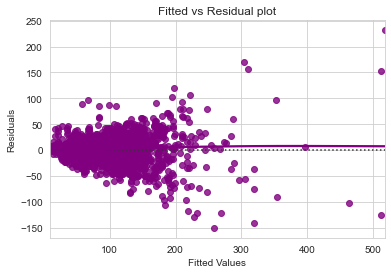

In [53]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern.

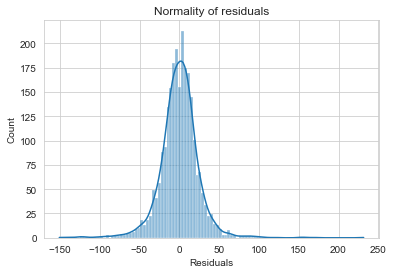

In [54]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Normal distribution. 

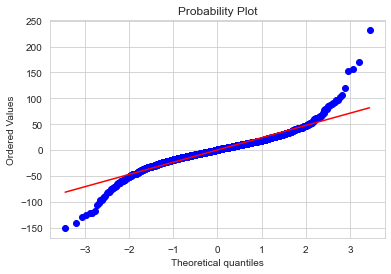

In [55]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most points lie in straight line in QQ plot. 

In [56]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9171565175056458, pvalue=1.7537674320666623e-34)

The residuals are not normal, but we will accept as normal. 

In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [58]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train9)
lzip(name, test)

NameError: name 'x_train9' is not defined

Residuals are homoscedastic. P value > 0.05.

## Final Model Summary

In [ ]:
print(olsres_11.summary())

The model is able to explain about 80% of our data. 
A unit increase in used price will correlate to a 2.37 unit increase in ram, with all other variables remaining constant.  
A unit increase in used price will correlate to a 1.67 unit increase in selfie camera mp, with all other variables remaining constant. 
A unit increase in used price will correlate to a 1.14 unit increase in main camera mp, with all other variables remaining constant.

## Actionable Insights and Recommendations

- 

We could predict the model linear regression summary to come up with exactly how this company needs to predict their upcoming year.  When acquiring new product, it would be wise, based on the model, to focus on ram, and camera mp instead of the other less important variables which reflect on the overall used price which the company would use as an indicator for which price to price their product at.  